In [28]:
# This Python 3 environment comes with many helpful analytics libraries installe
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



In [9]:
import pandas as pd

df = pd.read_csv(r'C:\Users\AJITH\Downloads\archive (3)\ElectricCarData_Clean_Me.csv')



In [11]:
df

Brand                            Model  AccelSec  TopSpeed_KmH  \
0         Tesla    Model 3 Long Range Dual Motor       4.6           233   
1    Volkswagen                        ID.3 Pure      10.0           160   
2      Polestar                                2       4.7           210   
3           BMW                              iX3       6.8           180   
4         Honda                                e       9.5           145   
..          ...                              ...       ...           ...   
97       Nissan                      Ariya 63kWh       7.5           160   
98         Audi    e-tron S Sportback 55 quattro       4.5           210   
99       Nissan              Ariya e-4ORCE 63kWh       5.9           200   
100      Nissan  Ariya e-4ORCE 87kWh Performance       5.1           200   
101       Byton                M-Byte 95 kWh 2WD       7.5           190   

     Range_Km  Battery_Pack Kwh  Efficiency_WhKm  FastCharge_KmH RapidCharge  \
0         460              70.0              161             940         Yes   
1         270              45.0              167             250         Yes   
2         400              75.0              181             620         Yes   
3         360              74.0              206             560         Yes   
4         170              28.5              168             190         Yes   
..        ...               ...              ...             ...         ...   
97        330              63.0              191             440         Yes   
98        335              86.5              258             540         Yes   
99        325              63.0              194             440         Yes   
100       375              87.0              232             450         Yes   
101       400              95.0              238             480         Yes   

    PowerTrain    PlugType  BodyStyle Segment  Seats  PriceEuro  
0          AWD  Type 2 CCS      Sedan       D      5      55480  
1          RWD  Type 2 CCS  Hatchback       C      5      30000  
2          AWD  Type 2 CCS   Liftback       D      5      56440  
3          RWD  Type 2 CCS        SUV       D      5      68040  
4          RWD  Type 2 CCS  Hatchback       B      4      32997  
..         ...         ...        ...     ...    ...        ...  
97         FWD  Type 2 CCS  Hatchback       C      5      45000  
98         AWD  Type 2 CCS        SUV       E      5      96050  
99         AWD  Type 2 CCS  Hatchback       C      5      50000  
100        AWD  Type 2 CCS  Hatchback       C      5      65000  
101        AWD  Type 2 CCS        SUV       E      5      62000  

[102 rows x 15 columns]

In [12]:
df.isnull().sum()

Brand               0
Model               0
AccelSec            0
TopSpeed_KmH        0
Range_Km            0
Battery_Pack Kwh    0
Efficiency_WhKm     0
FastCharge_KmH      0
RapidCharge         0
PowerTrain          0
PlugType            0
BodyStyle           0
Segment             0
Seats               0
PriceEuro           0
dtype: int64

In [13]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Battery_Pack Kwh', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge',
       'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [16]:
df['FullName'] = df['Brand'] + '-' + df['Model']
df_1 = df.loc[df['PriceEuro'] <= 50000]
df_2 = df.loc[df['PriceEuro'] > 50000]
t1 = 'Less than 50,000 Euros' 
t2 = 'More than 50,000 Euros'

#### Function for data visualization
## Count plots


#### count plot for powertrain

def power_train(dataframe): 
    sns.countplot(x= dataframe['PowerTrain'])
    plt.title('Count Plot of Powertrain', fontsize = 20)
    plt.xlabel('Power Train', fontsize = 15)
    plt.ylabel('Count', fontsize = 15)

In [19]:
## Count plot for body style


def bodystyle(dataframe):
    plt.figure(figsize=(10, 5))
    sns.countplot(x= 'BodyStyle', data= dataframe, hue='PowerTrain')
    plt.title('Count plot of Body Style', fontsize= 20)
    plt.xlabel('Body Style', fontsize= 15)
    plt.ylabel('Count', fontsize= 15)
    plt.show()

# Bar Graphs


In [32]:
##Function to plot range of vehicles
def range(dataframe, price):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot(x='FullName', y='Range_Km', data=dataframe, hue='PowerTrain')
  plt.title('''Range(Km) of EV's costing {} '''.format(price), fontsize = 20)
  plt.ylabel('Range (Km)', fontsize= 15)
  plt.xlabel('Model', fontsize= 15)
  plt.xticks(rotation = 90)
  plt.show()

In [22]:
##Range vs Battery Pack

def range_batterypack(dataframe, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'steelblue')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.105))
  ax2 = ax1.twinx()
  ax2.scatter(dataframe['FullName'], dataframe['Battery_Pack Kwh'], label= 'Battery Pack', color = 'black')
  plt.title('''RANGE (Km) vs BATTERY PACK CAPACITY (KwH) of EV's costing {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Range (Km)', color = 'steelblue', size = 20)
  ax2.set_ylabel('Battery Pack Capacity (Kwh)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()


In [38]:
##Acceleration (0 - 100Km/Hr)

def acc(dataframe, text):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot(x='FullName', y='AccelSec', data=dataframe, hue='PowerTrain')
  plt.title('''Acceleration 0-100 Km  of EV's costing {}'''.format(text), fontsize= 20)
  plt.ylabel('Acceleration (seconds)')
  plt.xlabel('Model')
  plt.xticks(rotation = 90)
  plt.show()

In [44]:
##Range vs Price

def range_price(dataframe, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'steelblue')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.1))
  ax2 = ax1.twinx()
  ax2.scatter(dataframe['FullName'], dataframe['PriceEuro'], label= 'Price', color = 'black')
  plt.title('''RANGE (Km) vs PRICE (Euros)of EV's costing {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Range (Km)', color = 'steelblue', size = 20)
  ax2.set_ylabel('Price (Euros)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()


In [23]:
##Range vs Efficiency

def range_efficiency(dataframe, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'darkseagreen')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.1))
  ax2 = ax1.twinx()
  ax2.scatter(dataframe['FullName'], dataframe['Efficiency_WhKm'], label= 'Price', color = 'black')
  plt.title('''RANGE (Km) vs Efficiency (Wh/km)of EV's costing {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Range (Km)', color = 'darkseagreen', size = 20)
  ax2.set_ylabel('Efficiency (Wh/Km)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()


In [48]:
##Fast charging data

def fastcharge(dataframe, price):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot(x='FullName', y='FastCharge_KmH', data=dataframe, color='lightslategrey')
  plt.title('''Fast Charging of EV's costing {} '''.format(price), fontsize = 20)
  plt.ylabel('Charging Capacity (kmH)', fontsize= 15)
  plt.xlabel('Model', fontsize= 15)
  plt.xticks(rotation = 90)
  plt.show()


In [57]:
# Descriptive Statistics
descriptive_stats = df.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
         AccelSec  TopSpeed_KmH    Range_Km  Battery_Pack Kwh  \
count  102.000000    102.000000  102.000000        102.000000   
mean     7.391176    179.313725  338.627451         65.415686   
std      3.031913     43.771228  126.700623         29.955782   
min      2.100000    123.000000   95.000000         16.700000   
25%      5.100000    150.000000  250.000000         43.125000   
50%      7.300000    160.000000  340.000000         64.350000   
75%      9.000000    200.000000  400.000000         83.700000   
max     22.400000    410.000000  970.000000        200.000000   

       Efficiency_WhKm  FastCharge_KmH       Seats      PriceEuro  
count       102.000000      102.000000  102.000000     102.000000  
mean        189.303922      435.686275    4.882353   55997.588235  
std          29.679072      220.447384    0.799680   34250.724403  
min         104.000000        0.000000    2.000000   20129.000000  
25%         168.000000      260.000000    5.000000

DATA VISUALIZATIONS

In [50]:
import pandas as pd

df = pd.read_csv(r'C:\Users\AJITH\Downloads\archive (3)\ElectricCarData_Clean_Me.csv')


In [51]:
df

Brand                            Model  AccelSec  TopSpeed_KmH  \
0         Tesla    Model 3 Long Range Dual Motor       4.6           233   
1    Volkswagen                        ID.3 Pure      10.0           160   
2      Polestar                                2       4.7           210   
3           BMW                              iX3       6.8           180   
4         Honda                                e       9.5           145   
..          ...                              ...       ...           ...   
97       Nissan                      Ariya 63kWh       7.5           160   
98         Audi    e-tron S Sportback 55 quattro       4.5           210   
99       Nissan              Ariya e-4ORCE 63kWh       5.9           200   
100      Nissan  Ariya e-4ORCE 87kWh Performance       5.1           200   
101       Byton                M-Byte 95 kWh 2WD       7.5           190   

     Range_Km  Battery_Pack Kwh  Efficiency_WhKm  FastCharge_KmH RapidCharge  \
0         460              70.0              161             940         Yes   
1         270              45.0              167             250         Yes   
2         400              75.0              181             620         Yes   
3         360              74.0              206             560         Yes   
4         170              28.5              168             190         Yes   
..        ...               ...              ...             ...         ...   
97        330              63.0              191             440         Yes   
98        335              86.5              258             540         Yes   
99        325              63.0              194             440         Yes   
100       375              87.0              232             450         Yes   
101       400              95.0              238             480         Yes   

    PowerTrain    PlugType  BodyStyle Segment  Seats  PriceEuro  
0          AWD  Type 2 CCS      Sedan       D      5      55480  
1          RWD  Type 2 CCS  Hatchback       C      5      30000  
2          AWD  Type 2 CCS   Liftback       D      5      56440  
3          RWD  Type 2 CCS        SUV       D      5      68040  
4          RWD  Type 2 CCS  Hatchback       B      4      32997  
..         ...         ...        ...     ...    ...        ...  
97         FWD  Type 2 CCS  Hatchback       C      5      45000  
98         AWD  Type 2 CCS        SUV       E      5      96050  
99         AWD  Type 2 CCS  Hatchback       C      5      50000  
100        AWD  Type 2 CCS  Hatchback       C      5      65000  
101        AWD  Type 2 CCS        SUV       E      5      62000  

[102 rows x 15 columns]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


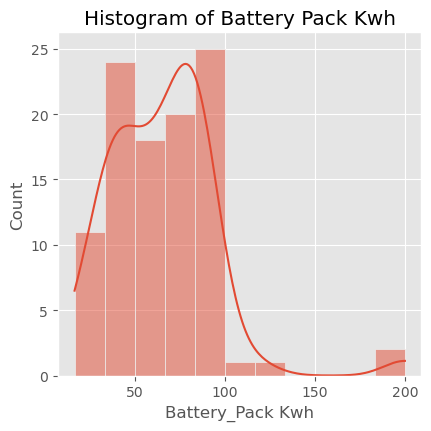

In [54]:
# Data Visualization
plt.figure(figsize=(12, 8))

# Example: Histogram of Battery Pack 
plt.subplot(2, 3, 1)
sns.histplot(df['Battery_Pack Kwh'], kde=True)
plt.title('Histogram of Battery Pack Kwh')

# Add more visualizations for other features...

plt.tight_layout()
plt.show()

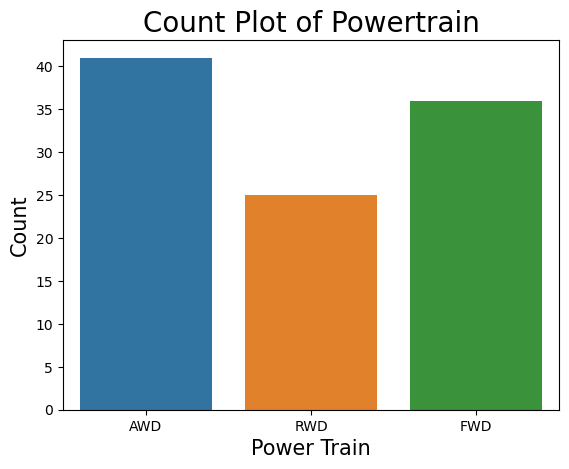

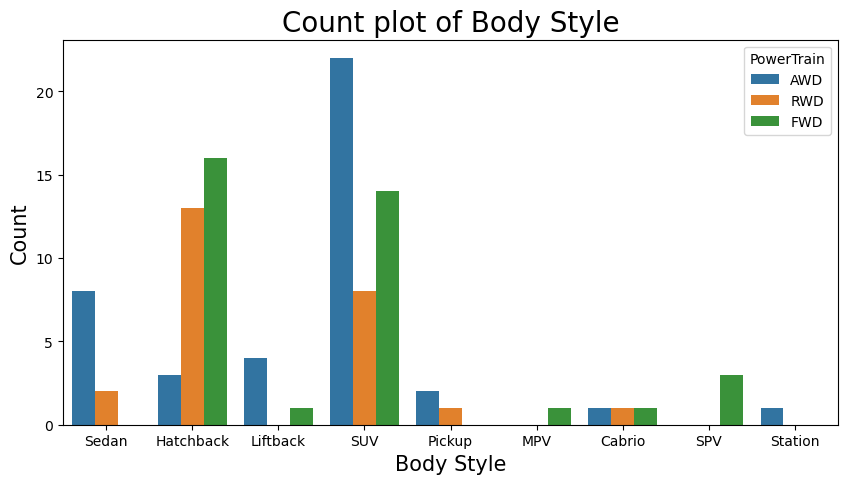

In [29]:
# Count Plots

import seaborn as sns

power_train(df)
bodystyle(df)

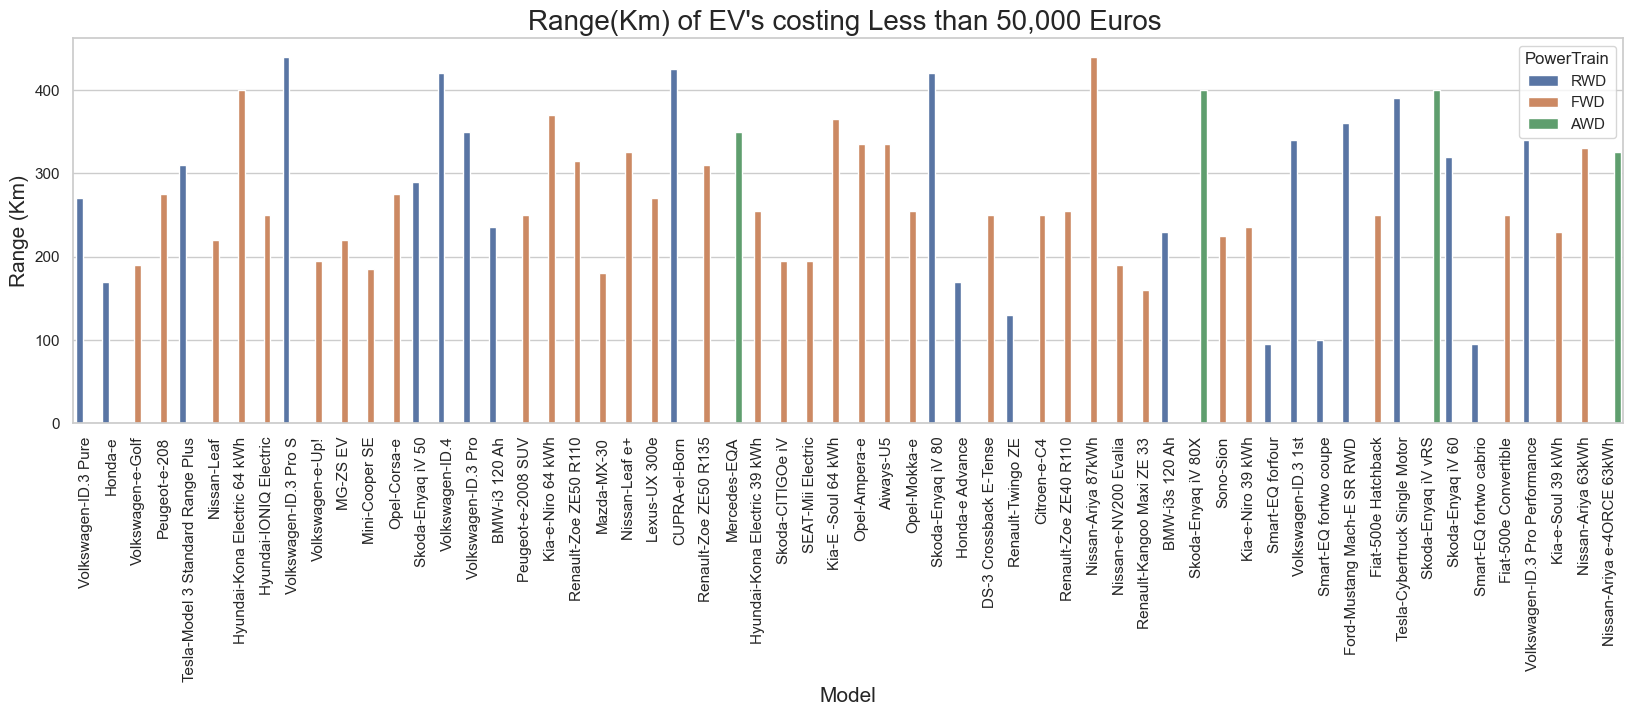

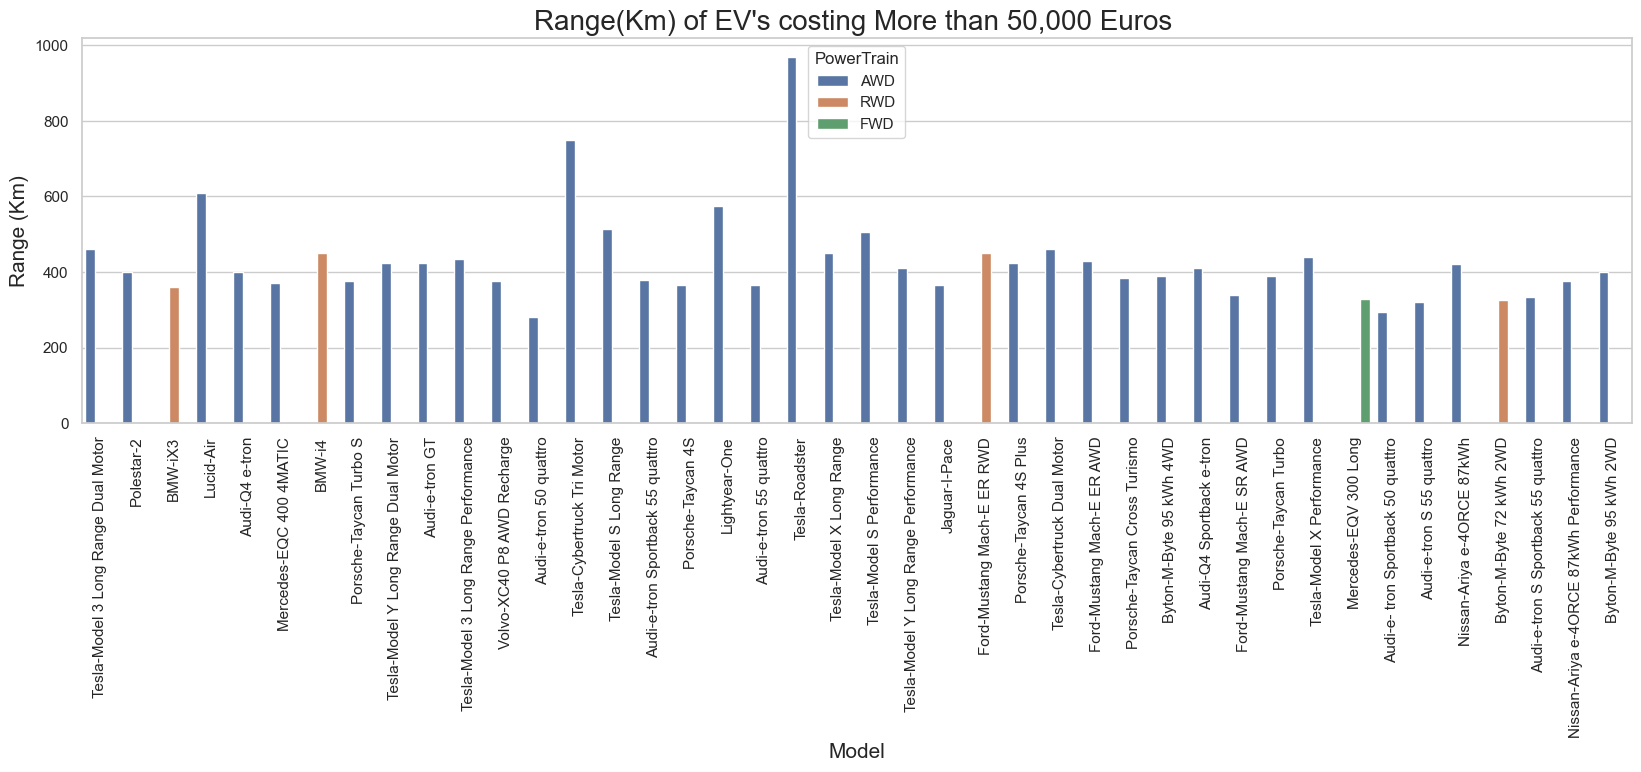

In [33]:
# Bar Graphs

range(df_1, t1)
range(df_2, t2)

C:\Users\AJITH\AppData\Local\Temp\ipykernel_2012\2416639348.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


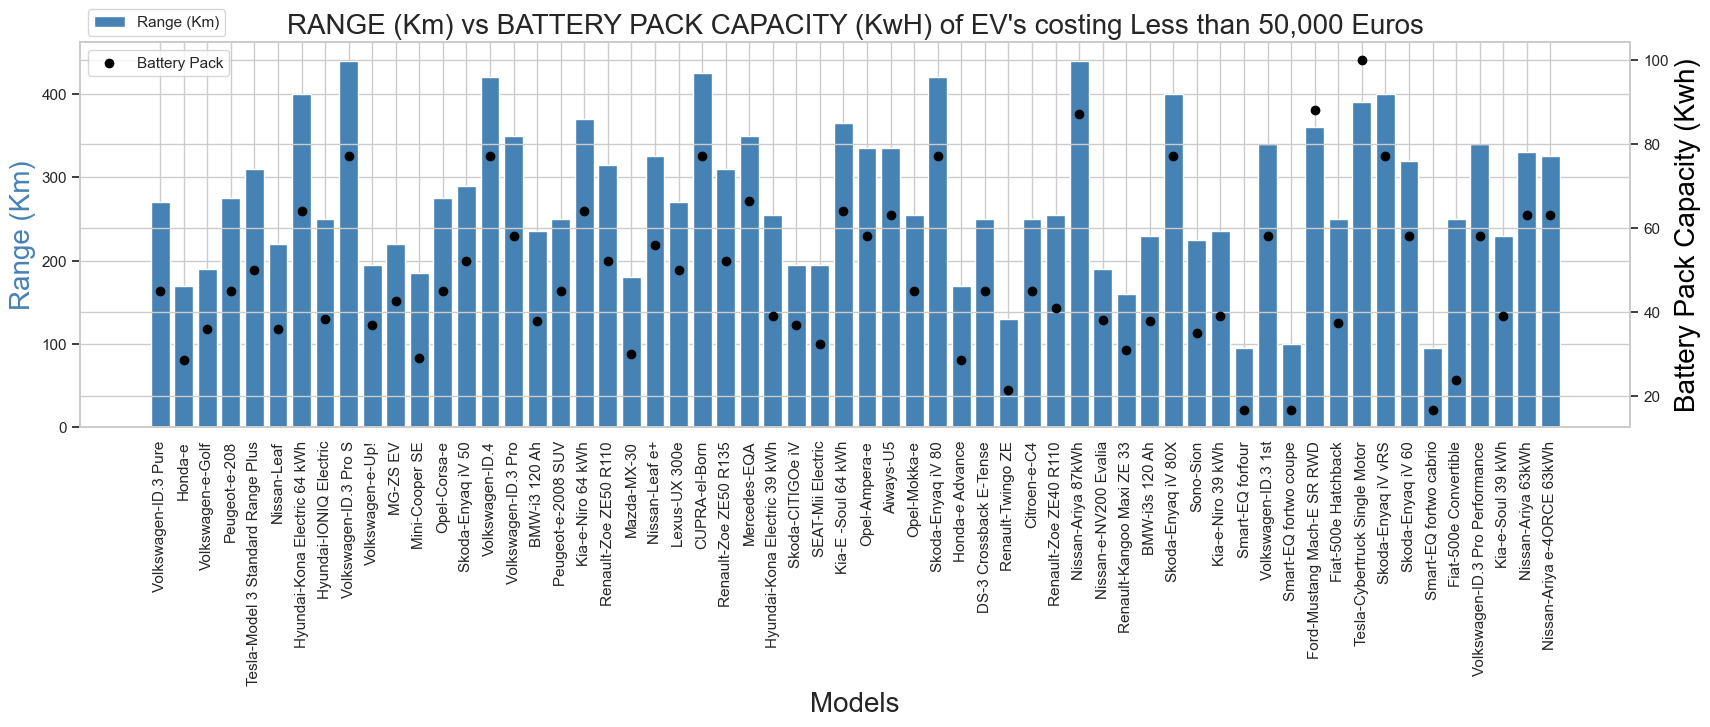

C:\Users\AJITH\AppData\Local\Temp\ipykernel_2012\2416639348.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


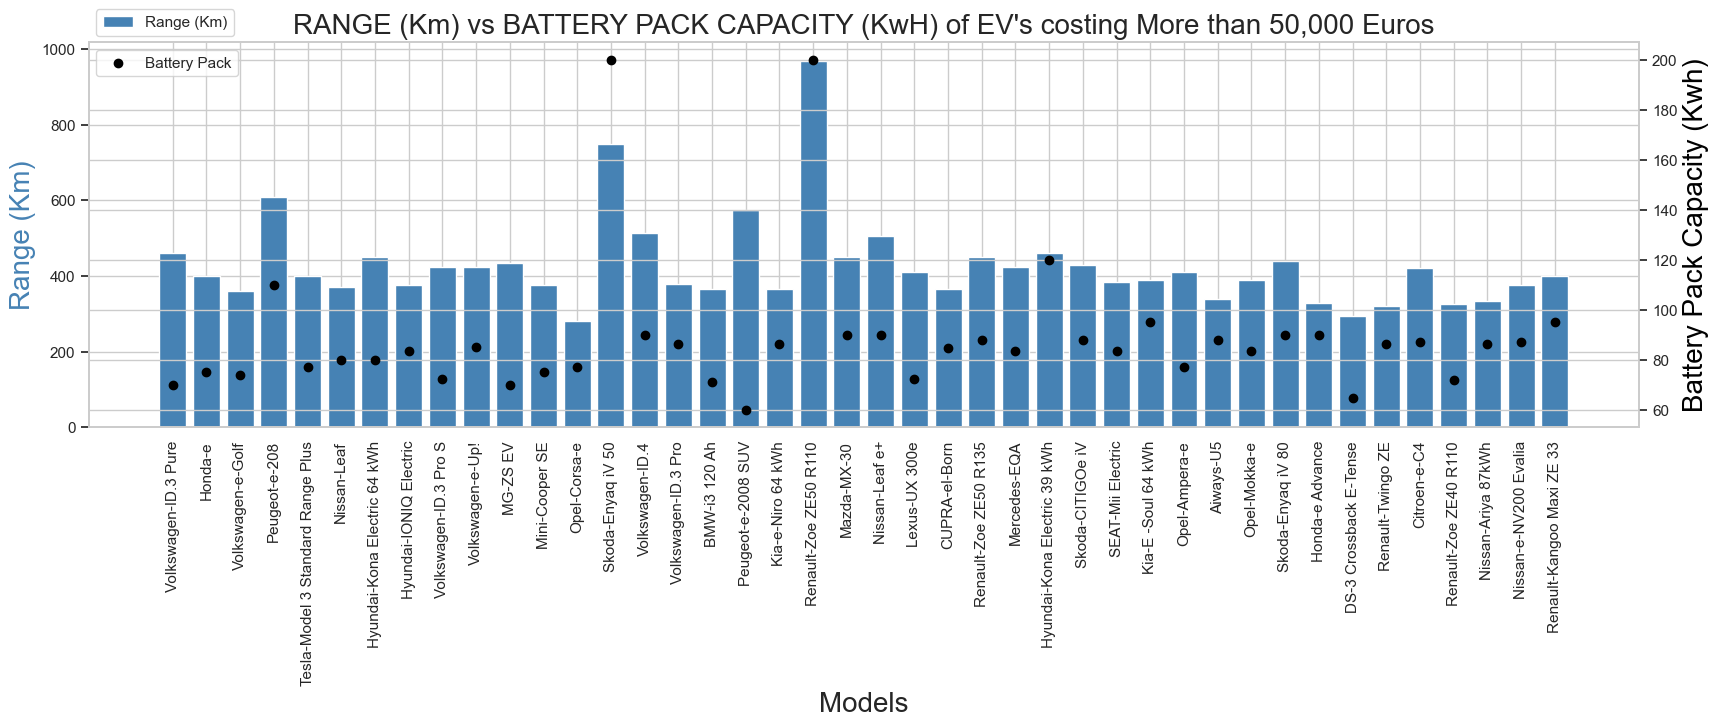

In [34]:
range_batterypack(df_1, t1)
range_batterypack(df_2, t2)

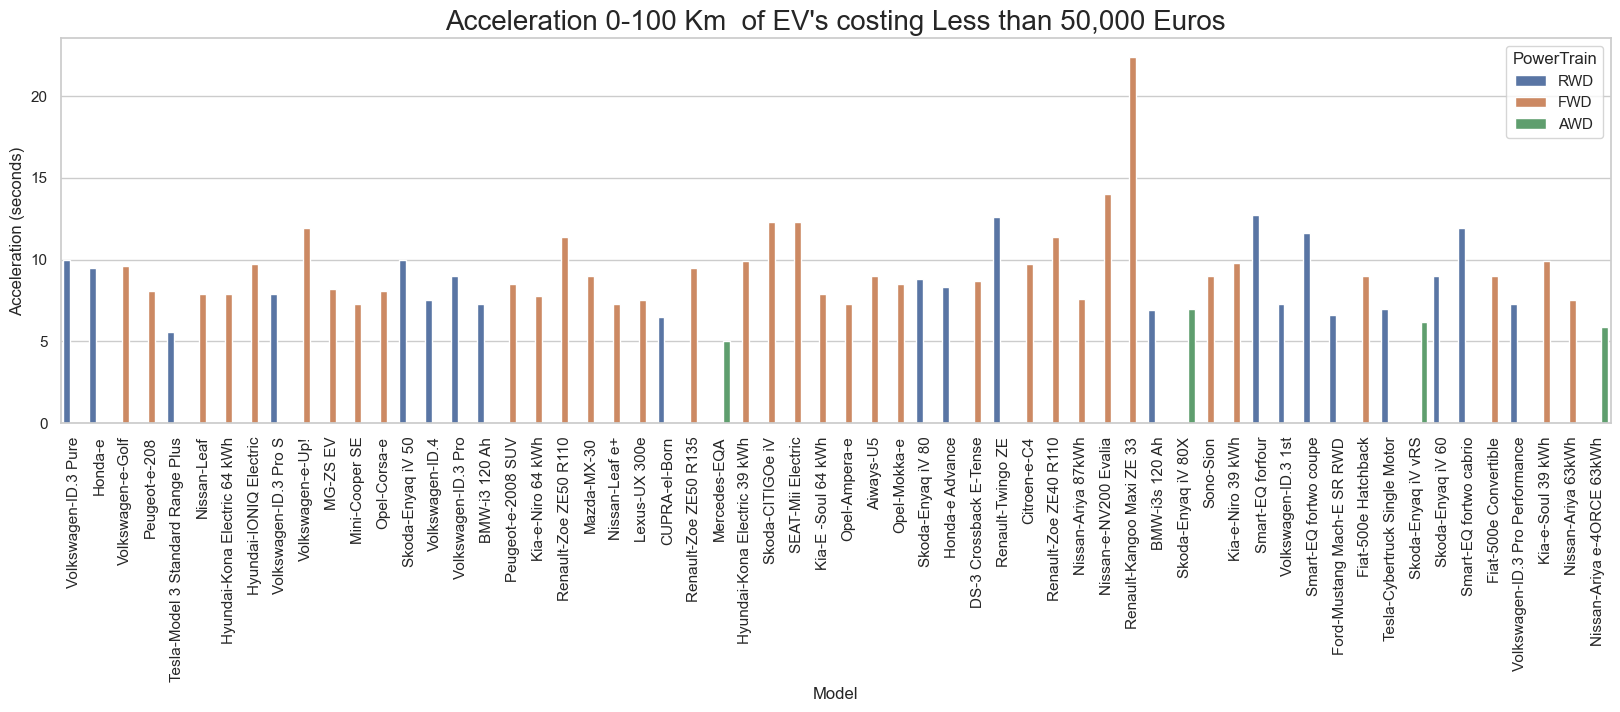

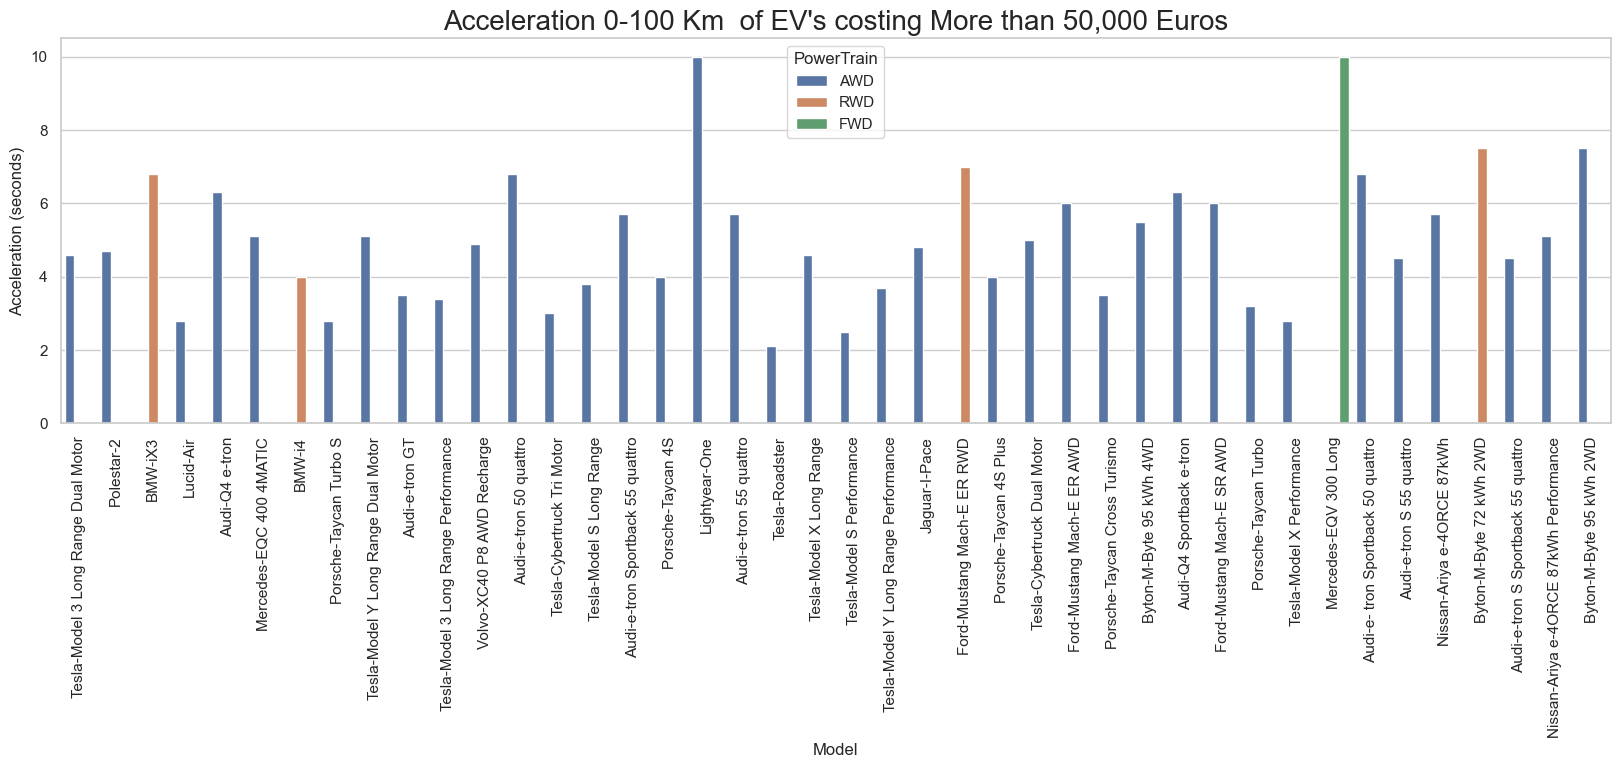

In [39]:
# Acceleration

acc(df_1, t1)
acc(df_2, t2)

C:\Users\AJITH\AppData\Local\Temp\ipykernel_2012\3641974835.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


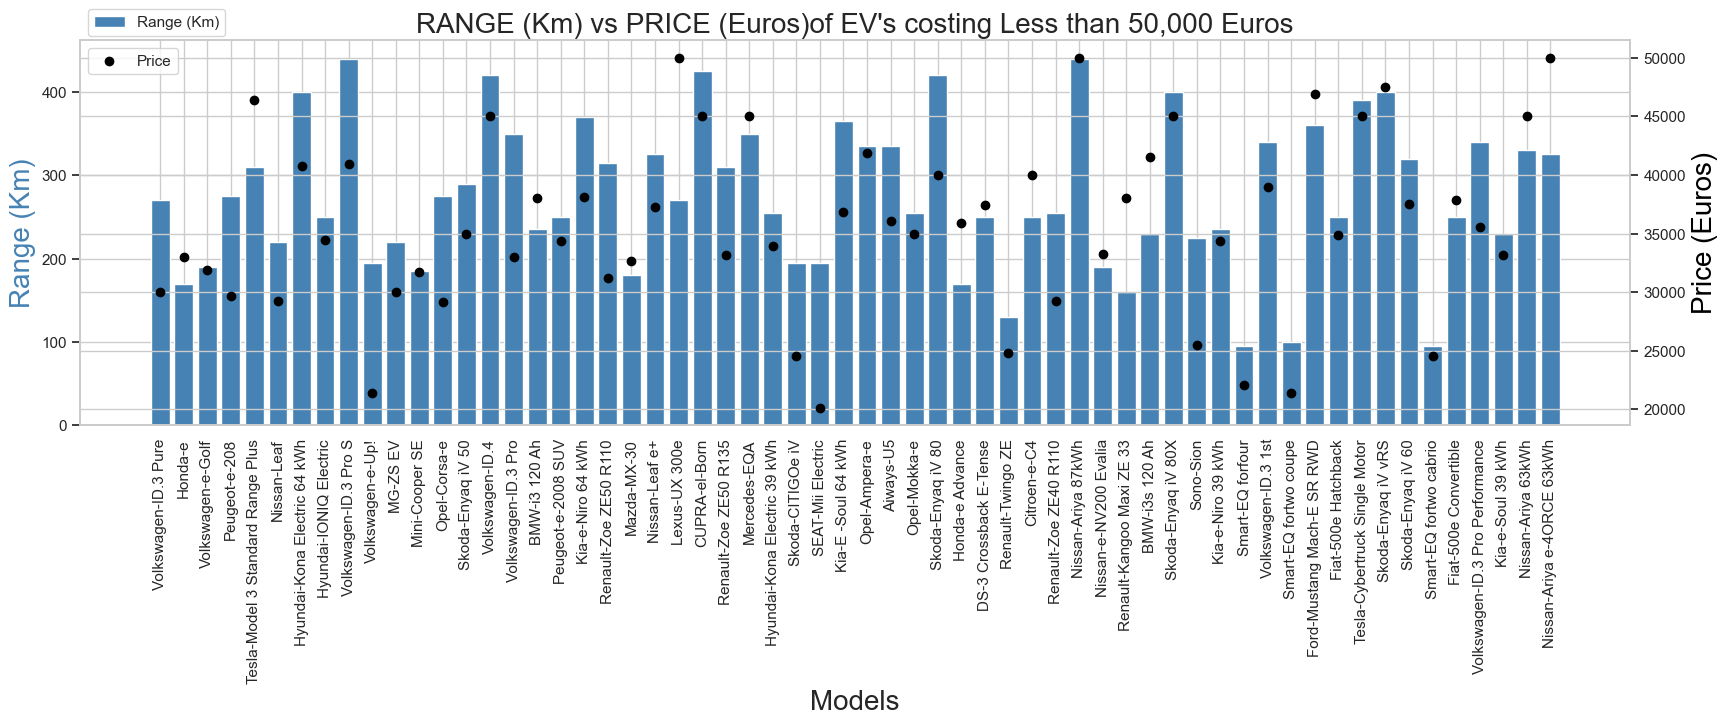

C:\Users\AJITH\AppData\Local\Temp\ipykernel_2012\3641974835.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


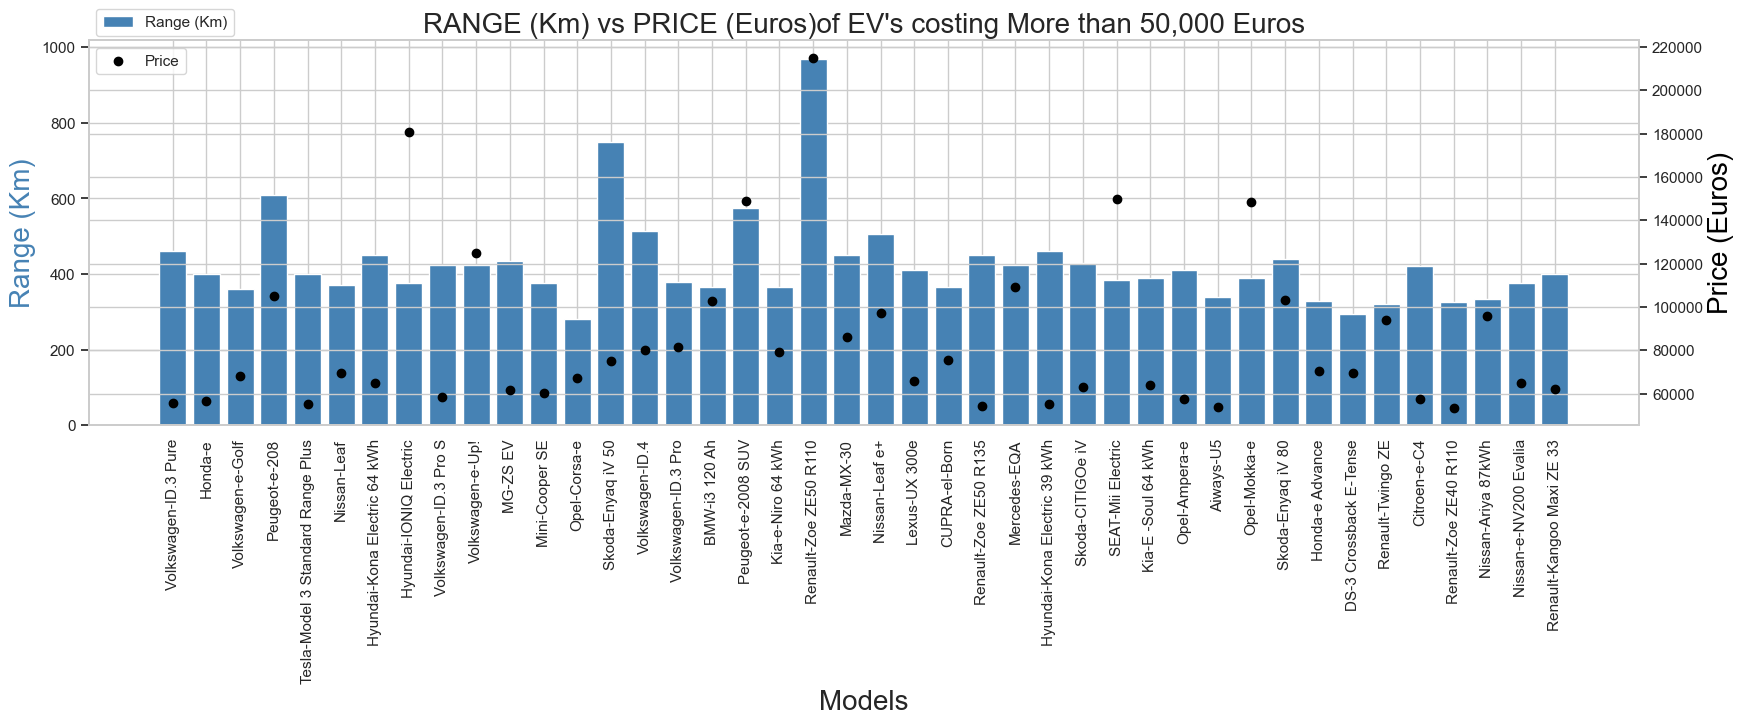

In [45]:
# price vs acceleration

range_price(df_1, t1)
range_price(df_2, t2)


C:\Users\AJITH\AppData\Local\Temp\ipykernel_2012\2138910508.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


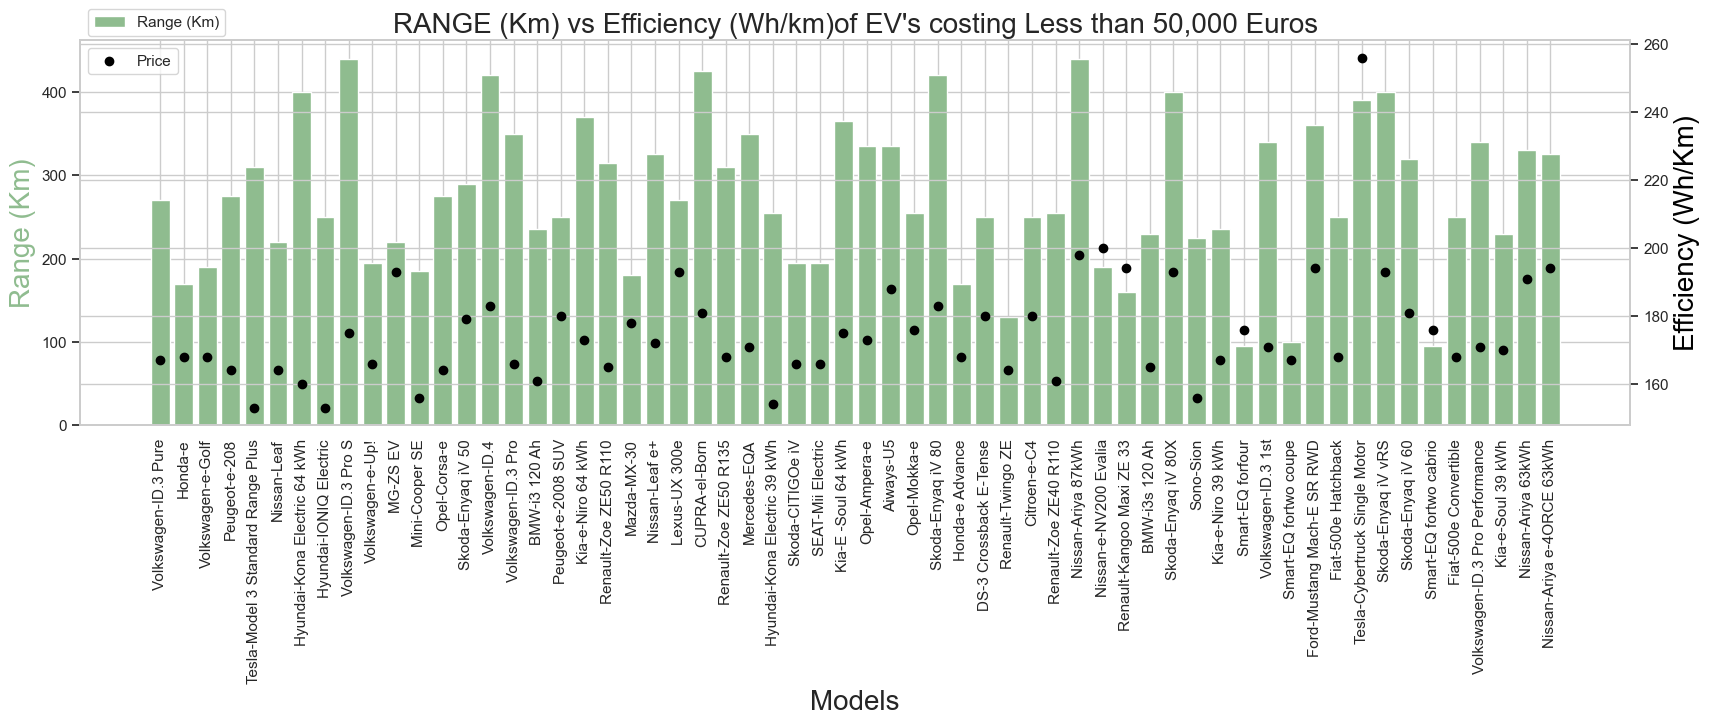

C:\Users\AJITH\AppData\Local\Temp\ipykernel_2012\2138910508.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


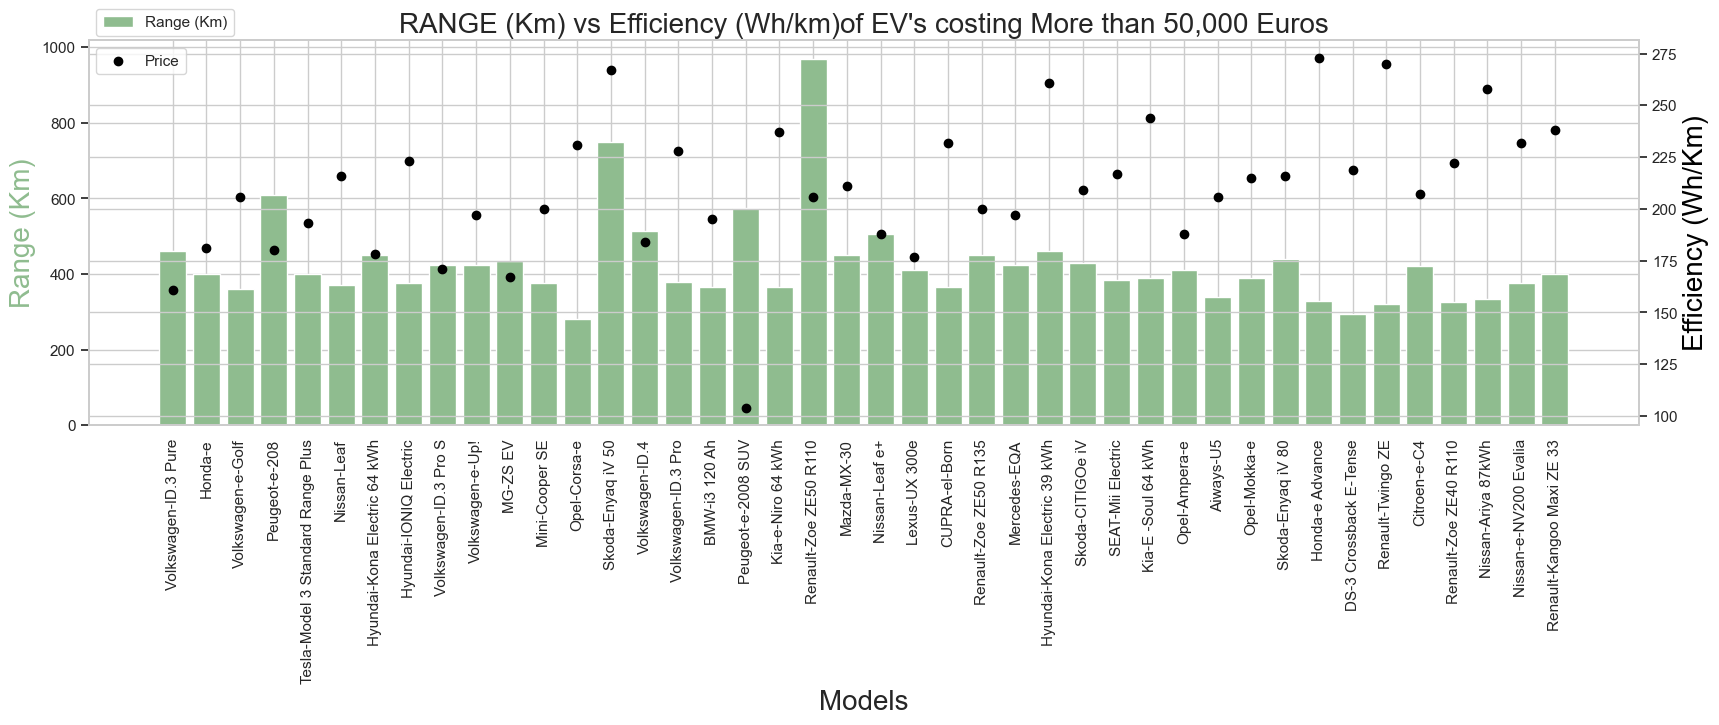

In [46]:
# range vs efficiency

range_efficiency(df_1, t1)
range_efficiency(df_2, t2)

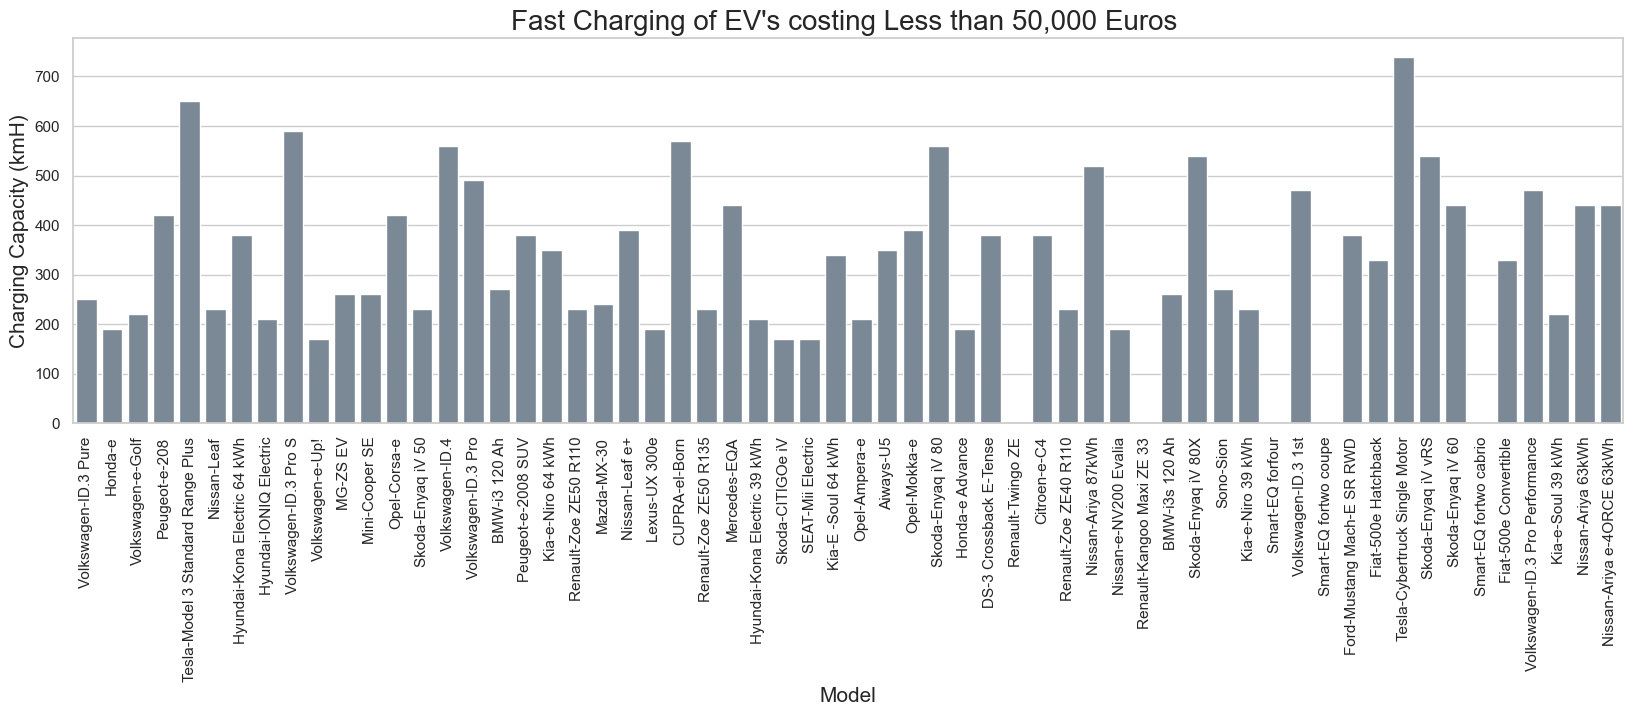

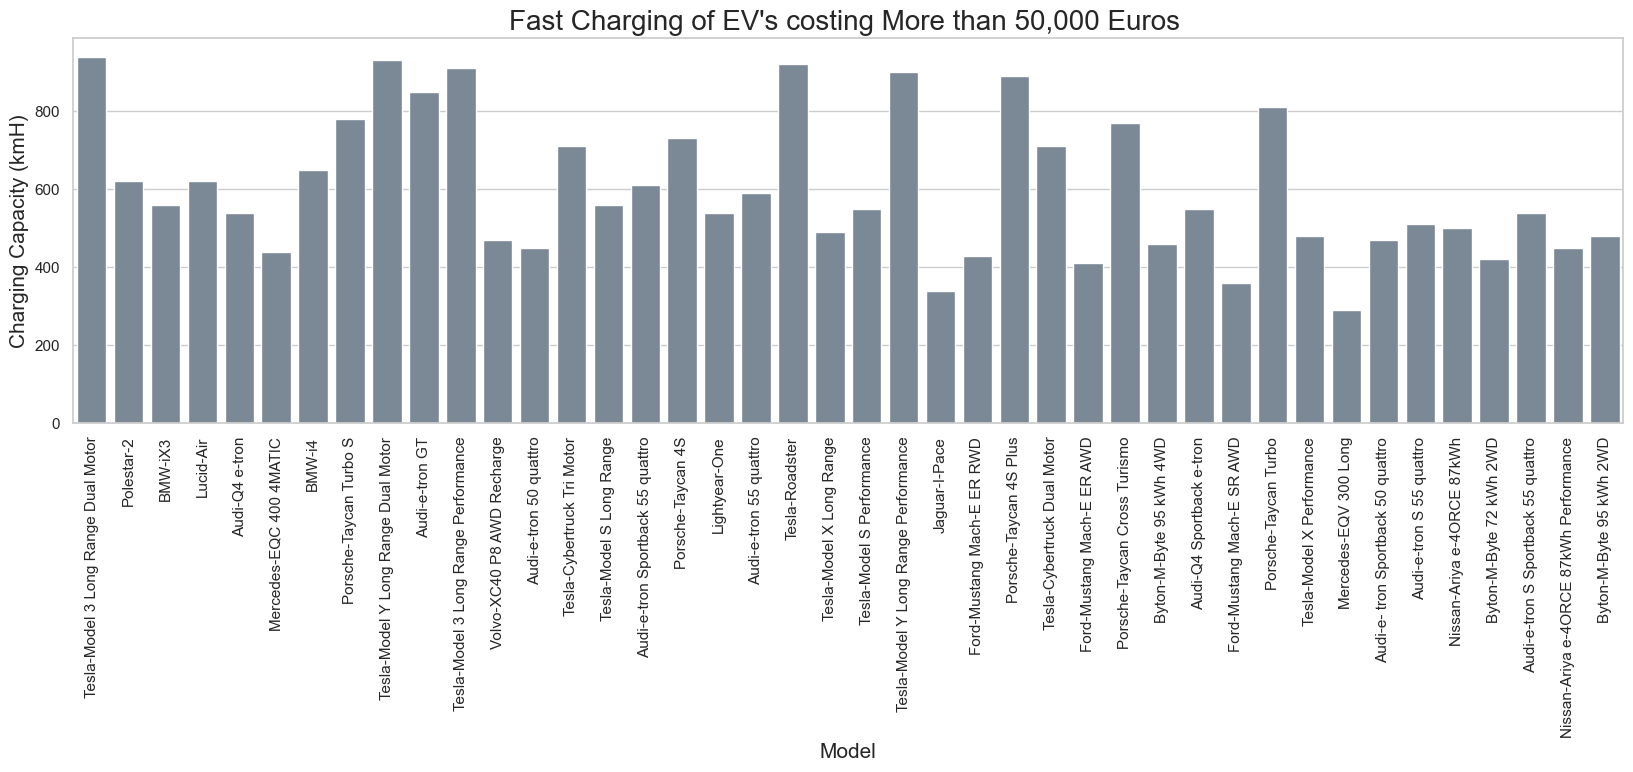

In [49]:
# Fast charge Data

fastcharge(df_1, t1)
fastcharge(df_2, t2)

Which vehicle has max range (km) under 50,000 Euros?

In [50]:
pd.set_option('display.max_columns', None)
top_range_1 = df_1.sort_values(by= 'Range_Km', ascending= False)
print(top_range_1[['FullName', 'Range_Km', 'Battery_Pack Kwh' ,'PriceEuro', 'RapidCharge']])

                             FullName  Range_Km  Battery_Pack Kwh  PriceEuro  \
62                 Nissan-Ariya 87kWh       440              87.0      50000   
15              Volkswagen-ID.3 Pro S       440              77.0      40936   
37                      CUPRA-el-Born       425              77.0      45000   
25                    Volkswagen-ID.4       420              77.0      45000   
53                  Skoda-Enyaq iV 80       420              77.0      40000   
12       Hyundai-Kona Electric 64 kWh       400              64.0      40795   
71                 Skoda-Enyaq iV 80X       400              77.0      45000   
88                 Skoda-Enyaq iV vRS       400              77.0      47500   
86      Tesla-Cybertruck Single Motor       390             100.0      45000   
31                  Kia-e-Niro 64 kWh       370              64.0      38105   
45                 Kia-E -Soul 64 kWh       365              64.0      36837   
83         Ford-Mustang Mach-E SR RWD   

Which vehicle has max range(Km) costing more than 50,000 Euros

In [51]:
pd.set_option('display.max_columns', None)
top_range_2 = df_2.sort_values(by= 'Range_Km', ascending= False)
print(top_range_2[['FullName', 'Range_Km', 'Battery_Pack Kwh' ,'PriceEuro', 'RapidCharge']])

                                   FullName  Range_Km  Battery_Pack Kwh  \
51                           Tesla-Roadster       970             200.0   
33               Tesla-Cybertruck Tri Motor       750             200.0   
5                                 Lucid-Air       610             110.0   
48                            Lightyear-One       575              60.0   
40                 Tesla-Model S Long Range       515              90.0   
59                Tesla-Model S Performance       505              90.0   
67              Tesla-Cybertruck Dual Motor       460             120.0   
0       Tesla-Model 3 Long Range Dual Motor       460              70.0   
54                 Tesla-Model X Long Range       450              90.0   
13                                   BMW-i4       450              80.0   
64               Ford-Mustang Mach-E ER RWD       450              88.0   
81                Tesla-Model X Performance       440              90.0   
24     Tesla-Model 3 Long

Vehicles with best acceleration under 50,000 Euros

In [52]:
pd.set_option('display.max_columns', None)
acceleration_1 = df_1.sort_values(by= 'AccelSec')
print(acceleration_1[['FullName','AccelSec', 'Range_Km', 'PowerTrain','Battery_Pack Kwh' ,'PriceEuro']])

                             FullName  AccelSec  Range_Km PowerTrain  \
39                       Mercedes-EQA       5.0       350        AWD   
8   Tesla-Model 3 Standard Range Plus       5.6       310        RWD   
99         Nissan-Ariya e-4ORCE 63kWh       5.9       325        AWD   
88                 Skoda-Enyaq iV vRS       6.2       400        AWD   
37                      CUPRA-el-Born       6.5       425        RWD   
83         Ford-Mustang Mach-E SR RWD       6.6       360        RWD   
70                     BMW-i3s 120 Ah       6.9       230        RWD   
86      Tesla-Cybertruck Single Motor       7.0       390        RWD   
71                 Skoda-Enyaq iV 80X       7.0       400        AWD   
28                      BMW-i3 120 Ah       7.3       235        RWD   
19                     Mini-Cooper SE       7.3       185        FWD   
35                     Nissan-Leaf e+       7.3       325        FWD   
80                Volkswagen-ID.3 1st       7.3       340       

Vehicles with best acceleration costing over 50,000 Euros

In [53]:
pd.set_option('display.max_columns', None)
acceleration_2 = df_2.sort_values(by= 'AccelSec')
print(acceleration_2[['FullName','AccelSec', 'Range_Km', 'PowerTrain','Battery_Pack Kwh' ,'PriceEuro']])

                                   FullName  AccelSec  Range_Km PowerTrain  \
51                           Tesla-Roadster       2.1       970        AWD   
59                Tesla-Model S Performance       2.5       505        AWD   
5                                 Lucid-Air       2.8       610        AWD   
81                Tesla-Model X Performance       2.8       440        AWD   
16                   Porsche-Taycan Turbo S       2.8       375        AWD   
33               Tesla-Cybertruck Tri Motor       3.0       750        AWD   
79                     Porsche-Taycan Turbo       3.2       390        AWD   
24     Tesla-Model 3 Long Range Performance       3.4       435        AWD   
23                           Audi-e-tron GT       3.5       425        AWD   
72             Porsche-Taycan Cross Turismo       3.5       385        AWD   
61     Tesla-Model Y Long Range Performance       3.7       410        AWD   
40                 Tesla-Model S Long Range       3.8       515 


Number of vehicles produced by each brand

In [54]:
companies = df.groupby('Brand').count()
print(companies['Model'].sort_values(ascending = False))

Brand
Tesla         13
Audi           9
Nissan         8
Volkswagen     8
Skoda          6
Porsche        5
Renault        5
Kia            4
BMW            4
Ford           4
Smart          3
Mercedes       3
Opel           3
Hyundai        3
Byton          3
Peugeot        2
Honda          2
Fiat           2
SEAT           1
Sono           1
Polestar       1
Aiways         1
MG             1
Mini           1
Mazda          1
Lucid          1
Lightyear      1
Lexus          1
Jaguar         1
DS             1
Citroen        1
CUPRA          1
Volvo          1
Name: Model, dtype: int64


Vehicles with maximum efficiency

In [55]:
pd.set_option('display.max_columns', None)
eff = df.sort_values(by= 'Efficiency_WhKm')
print(eff[['FullName','Efficiency_WhKm', 'Range_Km', 'PowerTrain','Battery_Pack Kwh' ,'PriceEuro']])

                              FullName  Efficiency_WhKm  Range_Km PowerTrain  \
48                       Lightyear-One              104       575        AWD   
14              Hyundai-IONIQ Electric              153       250        FWD   
8    Tesla-Model 3 Standard Range Plus              153       310        RWD   
41        Hyundai-Kona Electric 39 kWh              154       255        FWD   
74                           Sono-Sion              156       225        FWD   
..                                 ...              ...       ...        ...   
98  Audi-e-tron S Sportback 55 quattro              258       335        AWD   
67         Tesla-Cybertruck Dual Motor              261       460        AWD   
33          Tesla-Cybertruck Tri Motor              267       750        AWD   
90            Audi-e-tron S 55 quattro              270       320        AWD   
84               Mercedes-EQV 300 Long              273       330        FWD   

    Battery_Pack Kwh  PriceEuro  
48   

In [56]:
df.shape

(102, 16)

In [57]:
for column in [i for i in df.columns if df.dtypes[i]=='object']:
    print(column, len(df[column].unique()))

Brand 33
Model 102
RapidCharge 2
PowerTrain 3
PlugType 4
BodyStyle 9
Segment 8
FullName 102


In [58]:
df = df.drop(['Brand','Model','FullName'],axis=1)
df

AccelSec  TopSpeed_KmH  Range_Km  Battery_Pack Kwh  Efficiency_WhKm  \
0         4.6           233       460              70.0              161   
1        10.0           160       270              45.0              167   
2         4.7           210       400              75.0              181   
3         6.8           180       360              74.0              206   
4         9.5           145       170              28.5              168   
..        ...           ...       ...               ...              ...   
97        7.5           160       330              63.0              191   
98        4.5           210       335              86.5              258   
99        5.9           200       325              63.0              194   
100       5.1           200       375              87.0              232   
101       7.5           190       400              95.0              238   

     FastCharge_KmH RapidCharge PowerTrain    PlugType  BodyStyle Segment  \
0               940         Yes        AWD  Type 2 CCS      Sedan       D   
1               250         Yes        RWD  Type 2 CCS  Hatchback       C   
2               620         Yes        AWD  Type 2 CCS   Liftback       D   
3               560         Yes        RWD  Type 2 CCS        SUV       D   
4               190         Yes        RWD  Type 2 CCS  Hatchback       B   
..              ...         ...        ...         ...        ...     ...   
97              440         Yes        FWD  Type 2 CCS  Hatchback       C   
98              540         Yes        AWD  Type 2 CCS        SUV       E   
99              440         Yes        AWD  Type 2 CCS  Hatchback       C   
100             450         Yes        AWD  Type 2 CCS  Hatchback       C   
101             480         Yes        AWD  Type 2 CCS        SUV       E   

     Seats  PriceEuro  
0        5      55480  
1        5      30000  
2        5      56440  
3        5      68040  
4        4      32997  
..     ...        ...  
97       5      45000  
98       5      96050  
99       5      50000  
100      5      65000  
101      5      62000  

[102 rows x 13 columns]

In [59]:
X = df[[x for x in df.columns if x!='Range_Km']]
X = pd.get_dummies(X)
X

AccelSec  TopSpeed_KmH  Battery_Pack Kwh  Efficiency_WhKm  \
0         4.6           233              70.0              161   
1        10.0           160              45.0              167   
2         4.7           210              75.0              181   
3         6.8           180              74.0              206   
4         9.5           145              28.5              168   
..        ...           ...               ...              ...   
97        7.5           160              63.0              191   
98        4.5           210              86.5              258   
99        5.9           200              63.0              194   
100       5.1           200              87.0              232   
101       7.5           190              95.0              238   

     FastCharge_KmH  Seats  PriceEuro  RapidCharge_No  RapidCharge_Yes  \
0               940      5      55480           False             True   
1               250      5      30000           False             True   
2               620      5      56440           False             True   
3               560      5      68040           False             True   
4               190      4      32997           False             True   
..              ...    ...        ...             ...              ...   
97              440      5      45000           False             True   
98              540      5      96050           False             True   
99              440      5      50000           False             True   
100             450      5      65000           False             True   
101             480      5      62000           False             True   

     PowerTrain_AWD  PowerTrain_FWD  PowerTrain_RWD  PlugType_Type 1 CHAdeMO  \
0              True           False           False                    False   
1             False           False            True                    False   
2              True           False           False                    False   
3             False           False            True                    False   
4             False           False            True                    False   
..              ...             ...             ...                      ...   
97            False            True           False                    False   
98             True           False           False                    False   
99             True           False           False                    False   
100            True           False           False                    False   
101            True           False           False                    False   

     PlugType_Type 2  PlugType_Type 2 CCS  PlugType_Type 2 CHAdeMO  \
0              False                 True                    False   
1              False                 True                    False   
2              False                 True                    False   
3              False                 True                    False   
4              False                 True                    False   
..               ...                  ...                      ...   
97             False                 True                    False   
98             False                 True                    False   
99             False                 True                    False   
100            False                 True                    False   
101            False                 True                    False   

     BodyStyle_Cabrio  BodyStyle_Hatchback  BodyStyle_Liftback  BodyStyle_MPV  \
0               False                False               False          False   
1               False                 True               False          False   
2               False                False                True          False   
3               False                False               False          False   
4               False                 True               False          False   
..                ...              

In [60]:
Y = df['Range_Km']
Y

0      460
1      270
2      400
3      360
4      170
      ... 
97     330
98     335
99     325
100    375
101    400
Name: Range_Km, Length: 102, dtype: int64

In [61]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [10]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter grid
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create RandomForestRegressor instance
rf = RandomForestRegressor()

# Create RandomizedSearchCV object
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)


In [20]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_distributions, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

rf_random.fit(X, Y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [18]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
from sklearn.ensemble import RandomForestRegressor
base_model = RandomForestRegressor(n_estimators=1600, random_state=42)
base_model.fit(X, Y)
base_accuracy = evaluate(base_model, X, Y)

Model Performance
Average Error: 30.0846 degrees.
Accuracy = 140.18%.


Working on other data set


# This Dataset presents a detailed exploration of various vehicles providing valuable insights into their specifications, pricing, and performance metrics

In [2]:
#Importing libraries 
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
plt.style.use('ggplot')

In [10]:
#Read CSV file 
df = pd.read_csv(r'C:\Users\AJITH\Downloads\archive (4)\EV_cars.csv')


STEP 1: Data Understanding

In [11]:
df.shape

(360, 9)

In [12]:
df.head()

Battery                             Car_name  \
0     75.0  Tesla Model Y Long Range Dual Motor   
1     57.5                        Tesla Model 3   
2     60.5                           BYD ATTO 3   
3     61.7               MG MG4 Electric 64 kWh   
4     75.0  Tesla Model 3 Long Range Dual Motor   

                                       Car_name_link  Efficiency  Fast_charge  \
0  https://ev-database.org/car/1619/Tesla-Model-Y...         172        670.0   
1     https://ev-database.org/car/1991/Tesla-Model-3         137        700.0   
2        https://ev-database.org/car/1782/BYD-ATTO-3         183        370.0   
3  https://ev-database.org/car/1708/MG-MG4-Electr...         171        630.0   
4  https://ev-database.org/car/1992/Tesla-Model-3...         149        780.0   

   Price.DE.  Range  Top_speed  acceleration..0.100.  
0    59017.0    435        217                   5.0  
1    46220.0    420        201                   6.1  
2    44625.0    330        160                   7.3  
3    39990.0    360        160                   7.9  
4    55220.0    505        201                   4.4

In [13]:
df.head()

Battery                             Car_name  \
0     75.0  Tesla Model Y Long Range Dual Motor   
1     57.5                        Tesla Model 3   
2     60.5                           BYD ATTO 3   
3     61.7               MG MG4 Electric 64 kWh   
4     75.0  Tesla Model 3 Long Range Dual Motor   

                                       Car_name_link  Efficiency  Fast_charge  \
0  https://ev-database.org/car/1619/Tesla-Model-Y...         172        670.0   
1     https://ev-database.org/car/1991/Tesla-Model-3         137        700.0   
2        https://ev-database.org/car/1782/BYD-ATTO-3         183        370.0   
3  https://ev-database.org/car/1708/MG-MG4-Electr...         171        630.0   
4  https://ev-database.org/car/1992/Tesla-Model-3...         149        780.0   

   Price.DE.  Range  Top_speed  acceleration..0.100.  
0    59017.0    435        217                   5.0  
1    46220.0    420        201                   6.1  
2    44625.0    330        160                   7.3  
3    39990.0    360        160                   7.9  
4    55220.0    505        201                   4.4

In [14]:
df.dtypes

Battery                 float64
Car_name                 object
Car_name_link            object
Efficiency                int64
Fast_charge             float64
Price.DE.               float64
Range                     int64
Top_speed                 int64
acceleration..0.100.    float64
dtype: object

In [15]:
df.describe()

Battery  Efficiency  Fast_charge      Price.DE.       Range  \
count  360.000000  360.000000   358.000000     309.000000  360.000000   
mean    71.187500  195.175000   552.960894   67264.284790  369.694444   
std     20.389849   31.909429   236.864801   34508.249544  107.315514   
min     21.300000  137.000000   170.000000   22550.000000  135.000000   
25%     57.500000  171.000000   360.000000   45690.000000  295.000000   
50%     71.000000  188.000000   520.000000   56942.000000  380.000000   
75%     85.000000  208.250000   680.000000   73100.000000  446.250000   
max    123.000000  295.000000  1290.000000  218000.000000  685.000000   

        Top_speed  acceleration..0.100.  
count  360.000000            360.000000  
mean   180.919444              7.288889  
std     36.232023              3.005897  
min    125.000000              2.100000  
25%    155.750000              4.900000  
50%    180.000000              6.750000  
75%    200.000000              9.000000  
max    320.000000             19.100000

Step 2: Data Preperation

Dropping irrelevant columns and rows
Identifying duplicated columns
Renaming Columns
Feature Creation

In [16]:
df.columns

Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')

In [17]:
df = df[['Battery', 
         'Car_name', 
         #'Car_name_link', 
         'Efficiency', 
         'Fast_charge',
         'Price.DE.', 
         'Range', 
         'Top_speed', 
         'acceleration..0.100.']]

In [18]:
# Rename the columns

df = df.rename(columns ={'acceleration..0.100.':' Acceleration_0_to_100'} )

In [19]:
df.head()

Battery                             Car_name  Efficiency  Fast_charge  \
0     75.0  Tesla Model Y Long Range Dual Motor         172        670.0   
1     57.5                        Tesla Model 3         137        700.0   
2     60.5                           BYD ATTO 3         183        370.0   
3     61.7               MG MG4 Electric 64 kWh         171        630.0   
4     75.0  Tesla Model 3 Long Range Dual Motor         149        780.0   

   Price.DE.  Range  Top_speed   Acceleration_0_to_100  
0    59017.0    435        217                     5.0  
1    46220.0    420        201                     6.1  
2    44625.0    330        160                     7.3  
3    39990.0    360        160                     7.9  
4    55220.0    505        201                     4.4

In [20]:
# Checking to see if this dataset has any null value

df.isna().sum()

Battery                    0
Car_name                   0
Efficiency                 0
Fast_charge                2
Price.DE.                 51
Range                      0
Top_speed                  0
 Acceleration_0_to_100     0
dtype: int64

In [21]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
355    False
356    False
357    False
358    False
359    False
Length: 360, dtype: bool

In [22]:
# Summary of the NULLL value 
df.isna().sum()

Battery                    0
Car_name                   0
Efficiency                 0
Fast_charge                2
Price.DE.                 51
Range                      0
Top_speed                  0
 Acceleration_0_to_100     0
dtype: int64

In [23]:
#Excluding the NULL and restting the data frame

df = df.loc[~df.isnull().any(axis=1)]\
        .reset_index(drop=True)\
        .copy()

In [24]:
# Check to see if there any duplicated records
df.duplicated().sum()

0

In [25]:
df.head()

Battery                             Car_name  Efficiency  Fast_charge  \
0     75.0  Tesla Model Y Long Range Dual Motor         172        670.0   
1     57.5                        Tesla Model 3         137        700.0   
2     60.5                           BYD ATTO 3         183        370.0   
3     61.7               MG MG4 Electric 64 kWh         171        630.0   
4     75.0  Tesla Model 3 Long Range Dual Motor         149        780.0   

   Price.DE.  Range  Top_speed   Acceleration_0_to_100  
0    59017.0    435        217                     5.0  
1    46220.0    420        201                     6.1  
2    44625.0    330        160                     7.3  
3    39990.0    360        160                     7.9  
4    55220.0    505        201                     4.4

Step 3: Feature Understanding

(Univariate analysis)

Plotting Feature Distribution Histogram KDE Boxplot



Text(0.5, 0, 'Price.DE.')

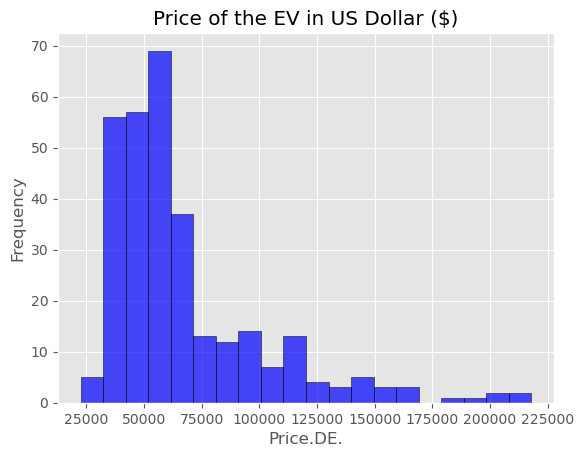

In [26]:
ax = df['Price.DE.']\
    .plot(kind='hist',
      bins = 20, 
      title = 'Price of the EV in US Dollar ($)',
      color = 'blue',
      edgecolor = 'black',
      alpha = 0.7)

ax.set_xlabel('Price.DE.')

Text(0.5, 0, 'Price.DE.')

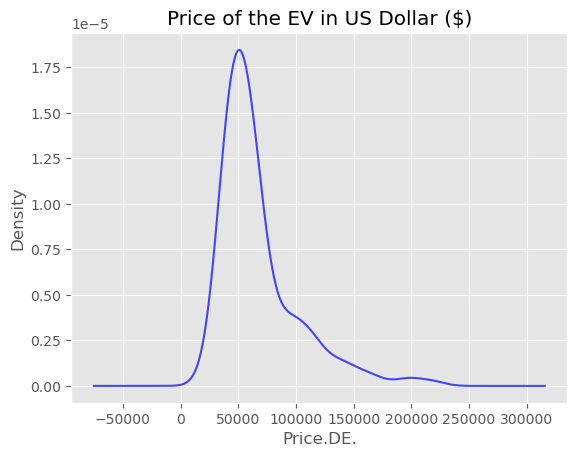

In [27]:
ax = df['Price.DE.']\
    .plot(kind='kde', 
     title = 'Price of the EV in US Dollar ($)',
      color = 'Blue',
       alpha = 0.7)

ax.set_xlabel('Price.DE.')

Step 4: Feature Relationships

Scatterplot
Heatmap Correlation
Pairplot
Groupby Comparisons

In [28]:
df

Battery                             Car_name  Efficiency  Fast_charge  \
0       75.0  Tesla Model Y Long Range Dual Motor         172        670.0   
1       57.5                        Tesla Model 3         137        700.0   
2       60.5                           BYD ATTO 3         183        370.0   
3       61.7               MG MG4 Electric 64 kWh         171        630.0   
4       75.0  Tesla Model 3 Long Range Dual Motor         149        780.0   
..       ...                                  ...         ...          ...   
302     46.3      Citroen e-Jumpy Combi XL 50 kWh         257        290.0   
303     46.3              Fiat E-Ulysse L2 50 kWh         250        290.0   
304     46.3         Opel Vivaro-e Combi L 50 kWh         257        290.0   
305     68.0          Opel Zafira-e Life M 75 kWh         257        290.0   
306     46.3              Fiat E-Ulysse L3 50 kWh         257        290.0   

     Price.DE.  Range  Top_speed   Acceleration_0_to_100  
0      59017.0    435        217                     5.0  
1      46220.0    420        201                     6.1  
2      44625.0    330        160                     7.3  
3      39990.0    360        160                     7.9  
4      55220.0    505        201                     4.4  
..         ...    ...        ...                     ...  
302    52730.0    180        130                    12.1  
303    55990.0    185        130                    12.1  
304    51825.0    180        130                    12.1  
305    69250.0    265        130                    13.3  
306    56990.0    180        130                    12.1  

[307 rows x 8 columns]

Text(0, 0.5, 'Range in Miles')

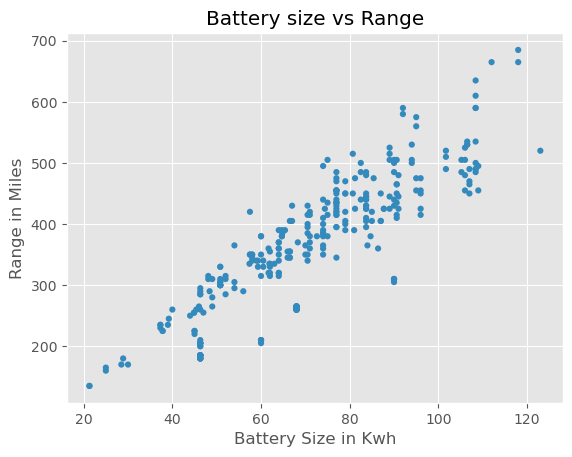

In [29]:
# Scatterplot using Matplotlib

ax = df.plot(kind = 'scatter',
       x='Battery',
       y= 'Range', 
       title = 'Battery size vs Range',
       edgecolor = 'none')

ax.set_xlabel ('Battery Size in Kwh')
ax.set_ylabel ('Range in Miles')


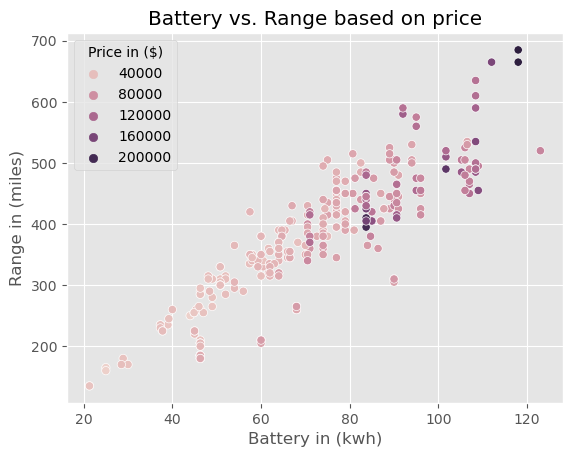

In [30]:
# Scatter plot with Seaborn 

sns.scatterplot(x='Battery',
                y= 'Range',
                hue = 'Price.DE.',
                data= df)

plt.title('Battery vs. Range based on price' )
plt.xlabel('Battery in (kwh)')
plt.ylabel('Range in (miles)')
plt.legend(title = 'Price in ($)')
plt.show()

In [32]:
df.columns

Index(['Battery', 'Car_name', 'Efficiency', 'Fast_charge', 'Price.DE.',
       'Range', 'Top_speed', ' Acceleration_0_to_100'],
      dtype='object')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

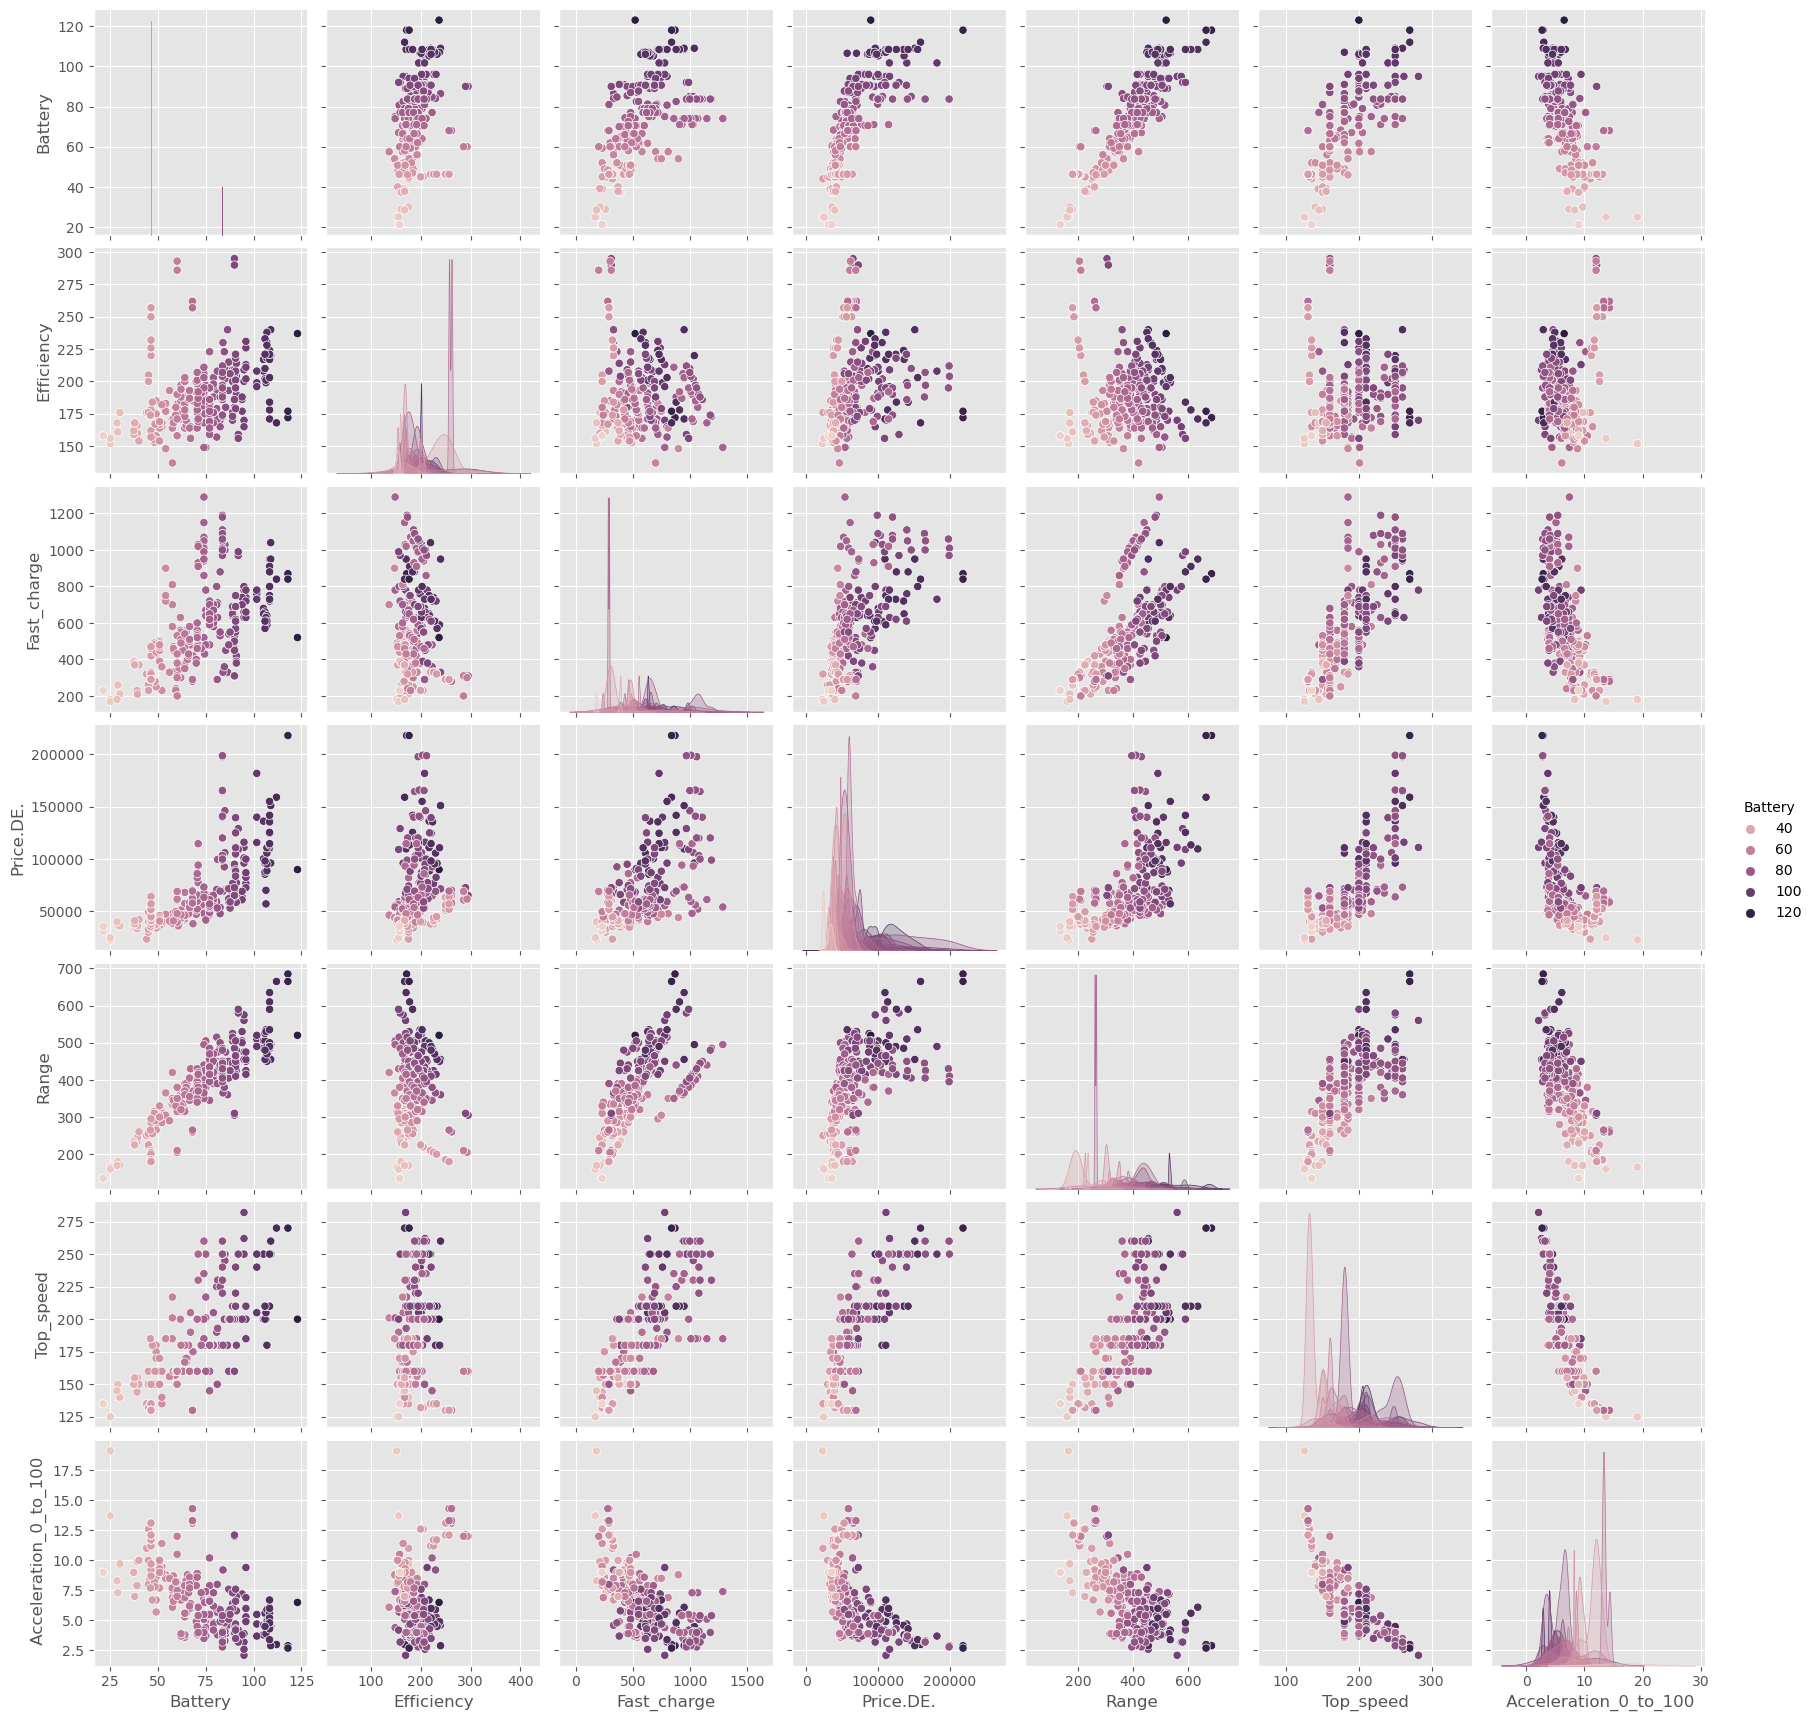

In [33]:
sns.pairplot(data = df, 
            vars= ['Battery', 'Efficiency', 'Fast_charge', 'Price.DE.',
                   'Range', 'Top_speed', ' Acceleration_0_to_100'],
            hue = 'Battery')
plt.show()

In [35]:
# dropp NULL values and setting up a df_corr to see the correlation 
df_corr = df[ ['Battery', 'Efficiency', 'Fast_charge', 'Price.DE.',
                   'Range', 'Top_speed', ' Acceleration_0_to_100']].dropna().corr()

<Axes: >

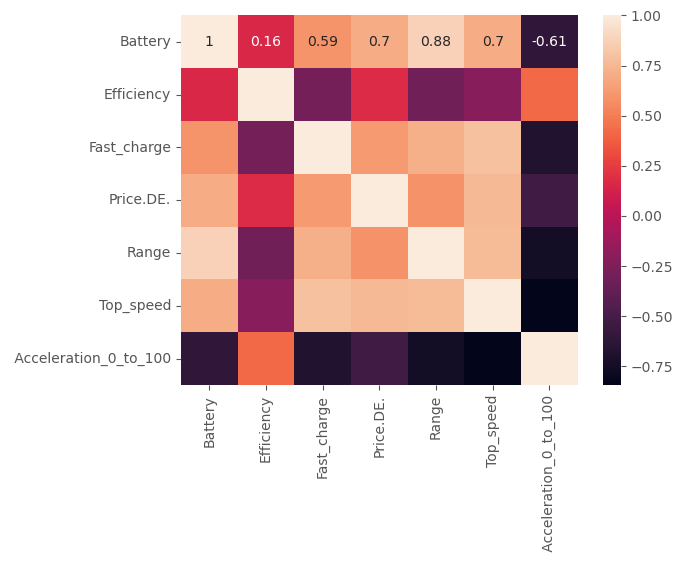

In [36]:
sns.heatmap(data = df_corr,
           annot = True)